# BREAST CANCER DETECTION USING LOGISTIC REGRESSION WITH KERAS

## Importing Data

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
features = data.data
labels = data.target

## Preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [7]:
labels = to_categorical(labels)

In [8]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=101)

In [9]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((398, 30), (171, 30), (398, 2), (171, 2))

## Defining and Training the Model

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(2, activation='sigmoid', input_dim=train_features.shape[1]))

In [12]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(train_features, train_labels, batch_size=1, epochs=10)

Epoch 1/10
398/398 [==============================] - 0s 801us/step - loss: 0.7168 - accuracy: 0.3769
Epoch 2/10
398/398 [==============================] - 0s 791us/step - loss: 0.6548 - accuracy: 0.6935
Epoch 3/10
398/398 [==============================] - 0s 794us/step - loss: 0.5970 - accuracy: 0.8467
Epoch 4/10
398/398 [==============================] - 0s 741us/step - loss: 0.5351 - accuracy: 0.8894
Epoch 5/10
398/398 [==============================] - 0s 782us/step - loss: 0.4748 - accuracy: 0.9372
Epoch 6/10
398/398 [==============================] - 0s 848us/step - loss: 0.4198 - accuracy: 0.9347
Epoch 7/10
398/398 [==============================] - 0s 822us/step - loss: 0.3766 - accuracy: 0.9296
Epoch 8/10
398/398 [==============================] - 0s 771us/step - loss: 0.3413 - accuracy: 0.9372
Epoch 9/10
398/398 [==============================] - 0s 787us/step - loss: 0.3131 - accuracy: 0.9422
Epoch 10/10
398/398 [==============================] - 0s 774us/step - loss: 0.291

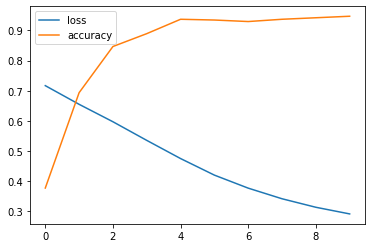

In [15]:
import pandas as pd
pd.DataFrame(model.history.history).plot()

## Making Predictions

In [16]:
model.evaluate(test_features, test_labels)

6/6 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.9357


[0.30422648787498474, 0.9356725215911865]